In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable


In [18]:

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train= np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [19]:
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [20]:
x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)

In [21]:
x_train

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [12]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


In [13]:
model = linearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [14]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

Epoch[20/1000], loss: 16.164804
Epoch[40/1000], loss: 11.473984
Epoch[60/1000], loss: 8.158768
Epoch[80/1000], loss: 5.815760
Epoch[100/1000], loss: 4.159847
Epoch[120/1000], loss: 2.989540
Epoch[140/1000], loss: 2.162433
Epoch[160/1000], loss: 1.577879
Epoch[180/1000], loss: 1.164749
Epoch[200/1000], loss: 0.872771
Epoch[220/1000], loss: 0.666417
Epoch[240/1000], loss: 0.520578
Epoch[260/1000], loss: 0.417506
Epoch[280/1000], loss: 0.344661
Epoch[300/1000], loss: 0.293178
Epoch[320/1000], loss: 0.256792
Epoch[340/1000], loss: 0.231077
Epoch[360/1000], loss: 0.212903
Epoch[380/1000], loss: 0.200058
Epoch[400/1000], loss: 0.190980
Epoch[420/1000], loss: 0.184564
Epoch[440/1000], loss: 0.180030
Epoch[460/1000], loss: 0.176825
Epoch[480/1000], loss: 0.174560
Epoch[500/1000], loss: 0.172960
Epoch[520/1000], loss: 0.171828
Epoch[540/1000], loss: 0.171029
Epoch[560/1000], loss: 0.170463
Epoch[580/1000], loss: 0.170064
Epoch[600/1000], loss: 0.169781
Epoch[620/1000], loss: 0.169582
Epoch[640/

In [15]:

model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()


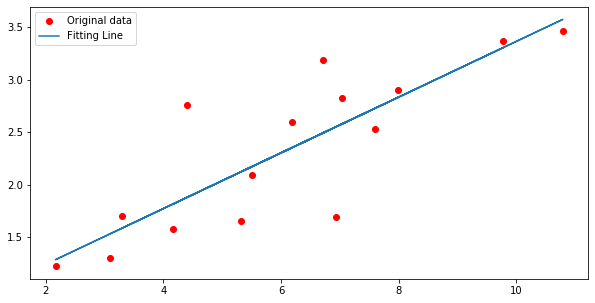

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()


In [17]:
torch.save(model.state_dict(), './linear.pth')